In [25]:
%matplotlib inline
from matplotlib import pylab as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import pandas as pd
import seaborn as sns

In [26]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [27]:
data = pd.read_csv("D202.csv")
data.head(2)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,12:00:00 AM,12:14:00 AM,0.01,kWh,0.0,NaN
1,Electric usage,10/22/2016,12:15:00 AM,12:29:00 AM,0.01,kWh,0.0,NaN


In [28]:
data["DATE_TIME"] = pd.to_datetime(data.DATE + " " + data["END TIME"])

In [29]:
data["DAY_TYPE"] = data.DATE_TIME.apply(lambda x: 1 if x.dayofweek > 5 else 0  )

In [30]:
cal = calendar()
holidays = cal.holidays(start = data.DATE_TIME.min(), end = data.DATE_TIME.max())
data["IS_HOLIDAY"] = data.DATE_TIME.isin(holidays)

In [31]:
data.head(3)


,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,DATE_TIME,DAY_TYPE,IS_HOLIDAY
0,Electric usage,10/22/2016,12:00:00 AM,12:14:00 AM,0.01,kWh,0.0,NaN,2016-10-22 00:14:00,0,False
1,Electric usage,10/22/2016,12:15:00 AM,12:29:00 AM,0.01,kWh,0.0,NaN,2016-10-22 00:29:00,0,False
2,Electric usage,10/22/2016,12:30:00 AM,12:44:00 AM,0.01,kWh,0.0,NaN,2016-10-22 00:44:00,0,False


In [32]:
for obs in range(1,6):
    data["T_" + str(obs)] = data.USAGE.shift(obs)

In [33]:
data.fillna(0.00,inplace=True)
data.head(10)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,DATE_TIME,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5
0,Electric usage,10/22/2016,12:00:00 AM,12:14:00 AM,0.01,kWh,0.0,0.0,2016-10-22 00:14:00,0,False,0.00,0.00,0.00,0.00,0.00
1,Electric usage,10/22/2016,12:15:00 AM,12:29:00 AM,0.01,kWh,0.0,0.0,2016-10-22 00:29:00,0,False,0.01,0.00,0.00,0.00,0.00
2,Electric usage,10/22/2016,12:30:00 AM,12:44:00 AM,0.01,kWh,0.0,0.0,2016-10-22 00:44:00,0,False,0.01,0.01,0.00,0.00,0.00
3,Electric usage,10/22/2016,12:45:00 AM,12:59:00 AM,0.01,kWh,0.0,0.0,2016-10-22 00:59:00,0,False,0.01,0.01,0.01,0.00,0.00
4,Electric usage,10/22/2016,01:00:00 AM,01:14:00 AM,0.01,kWh,0.0,0.0,2016-10-22 01:14:00,0,False,0.01,0.01,0.01,0.01,0.00
5,Electric usage,10/22/2016,01:15:00 AM,01:29:00 AM,0.01,kWh,0.0,0.0,2016-10-22 01:29:00,0,False,0.01,0.01,0.01,0.01,0.01
6,Electric usage,10/22/2016,01:30:00 AM,01:44:00 AM,0.01,kWh,0.0,0.0,2016-10-22 01:44:00,0,False,0.01,0.01,0.01,0.01,0.01
7,Electric usage,10/22/2016,01:45:00 AM,01:59:00 AM,0.01,kWh,0.0,0.0,2016-10-22 01:59:00,0,False,0.01,0.01,0.01,0.01,0.01
8,Electric usage,10/22/2016,02:00:00 AM,02:14:00 AM,0.02,kWh,0.0,0.0,2016-10-22 02:14:00,0,False,0.01,0.01,0.01,0.01,0.01
9,Electric usage,10/22/2016,02:15:00 AM,02:29:00 AM,0.02,kWh,0.0,0.0,2016-10-22 02:29:00,0,False,0.02,0.01,0.01,0.01,0.01


In [34]:
data.IS_HOLIDAY = data.IS_HOLIDAY.astype("int")

In [35]:
data.head(2)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,DATE_TIME,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5
0,Electric usage,10/22/2016,12:00:00 AM,12:14:00 AM,0.01,kWh,0.0,0.0,2016-10-22 00:14:00,0,0,0.00,0.0,0.0,0.0,0.0
1,Electric usage,10/22/2016,12:15:00 AM,12:29:00 AM,0.01,kWh,0.0,0.0,2016-10-22 00:29:00,0,0,0.01,0.0,0.0,0.0,0.0


In [43]:
clean_data = data[['DAY_TYPE', 'IS_HOLIDAY', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]

In [36]:
clean_data.head(2)

,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5,USAGE
0,0,0,0.00,0.0,0.0,0.0,0.0,0.01
1,0,0,0.01,0.0,0.0,0.0,0.0,0.01


In [37]:
training_data = data[data.DATE_TIME < pd.to_datetime("08/01/2017")]

In [38]:
val_mask = (data.DATE_TIME >= pd.to_datetime("08/01/2017")) & (data.DATE_TIME < pd.to_datetime("09/01/2017"))
val_data = data.loc[val_mask]

In [39]:
test_data = data[data.DATE_TIME >= pd.to_datetime("09/01/2017")]

In [40]:
training_data.tail(3)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,DATE_TIME,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5
27165,Electric usage,07/31/2017,11:15:00 PM,11:29:00 PM,0.12,kWh,0.02,0.0,2017-07-31 23:29:00,0,0,0.12,0.23,0.23,0.23,0.23
27166,Electric usage,07/31/2017,11:30:00 PM,11:44:00 PM,0.12,kWh,0.02,0.0,2017-07-31 23:44:00,0,0,0.12,0.12,0.23,0.23,0.23
27167,Electric usage,07/31/2017,11:45:00 PM,11:59:00 PM,0.12,kWh,0.02,0.0,2017-07-31 23:59:00,0,0,0.12,0.12,0.12,0.23,0.23


In [41]:
test_data.head(2)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,DATE_TIME,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5
30144,Electric usage,09/01/2017,12:00:00 AM,12:14:00 AM,0.04,kWh,0.01,0.0,2017-09-01 00:14:00,0,0,0.03,0.03,0.03,0.03,0.04
30145,Electric usage,09/01/2017,12:15:00 AM,12:29:00 AM,0.04,kWh,0.01,0.0,2017-09-01 00:29:00,0,0,0.04,0.03,0.03,0.03,0.03


In [44]:
clean_train = training_data[['DAY_TYPE', 'IS_HOLIDAY', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]
clean_test = test_data[['DAY_TYPE', 'IS_HOLIDAY', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]
clean_val = val_data[['DAY_TYPE', 'IS_HOLIDAY', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]

In [45]:
clean_train.head(2)

,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5,USAGE
0,0,0,0.00,0.0,0.0,0.0,0.0,0.01
1,0,0,0.01,0.0,0.0,0.0,0.0,0.01


In [46]:
clean_test.head(2)

,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5,USAGE
30144,0,0,0.03,0.03,0.03,0.03,0.04,0.04
30145,0,0,0.04,0.03,0.03,0.03,0.03,0.04


In [47]:
clean_val.head(3)

,DAY_TYPE,IS_HOLIDAY,T_1,T_2,T_3,T_4,T_5,USAGE
27168,0,0,0.12,0.12,0.12,0.12,0.23,0.08
27169,0,0,0.08,0.12,0.12,0.12,0.12,0.08
27170,0,0,0.08,0.08,0.12,0.12,0.12,0.08


In [53]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
X_train,y_train = clean_train.drop(["USAGE"],axis=1),clean_train.USAGE
X_test,y_test = clean_test.drop(["USAGE"],axis=1),clean_test.USAGE
X_val,y_val = clean_val.drop(["USAGE"],axis=1),clean_val.USAGE

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_valid_scaled = scaler.fit_transform(X_val)

/home/tharagesh/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tharagesh/.local/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [49]:
model_k = Sequential()
model_k.add(LSTM(1, input_shape=(1,7)))
model_k.add(Dense(1))
model_k.compile(loss='mean_squared_error', optimizer='adam')

In [57]:
X_t_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

In [58]:
X_val_resaped = X_valid_scaled.reshape((X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1]))

In [63]:
history = model_k.fit(X_t_reshaped, y_train, validation_data=(X_val_resaped, y_val),\
epochs=2, batch_size=96, verbose=2)

Train on 27168 samples, validate on 2976 samples
Epoch 1/2
 - 4s - loss: 0.0196 - val_loss: 0.0242
Epoch 2/2
 - 4s - loss: 0.0180 - val_loss: 0.0275


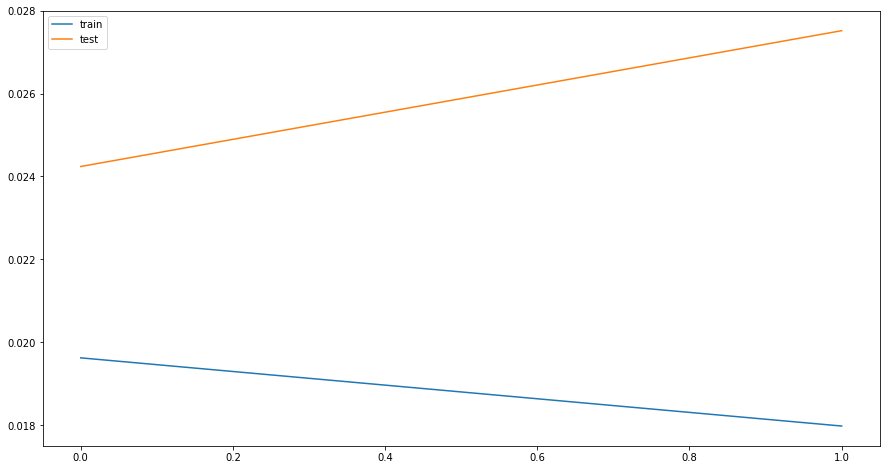

In [64]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [65]:
X_te_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [66]:
res = model_k.predict(X_te_reshaped)

In [67]:
test_data["DL_PRED"] = res

/home/tharagesh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
from numpy import sqrt
sqrt(mean_squared_error(test_data.USAGE,test_data.DL_PRED))

0.11917914309384448

AttributeError: 'DataFrame' object has no attribute 'RF_PREDICTED'